In [9]:
!nvidia-smi


Tue Mar 25 18:03:14 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   43C    P8              9W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [10]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Thu_Jun__6_02:18:23_PDT_2024
Cuda compilation tools, release 12.5, V12.5.82
Build cuda_12.5.r12.5/compiler.34385749_0


In [11]:
!echo "GPU: " && nvidia-smi


GPU: 
Tue Mar 25 18:03:15 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   43C    P8              9W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------

In [12]:
import torch
print(torch.cuda.is_available())  # Should print True if GPU is available


True




> Random seeding



In [13]:
import random
random.seed(0)
import numpy as np
np.random.seed(0)
import tensorflow as tf
tf.random.set_seed(0)

Importing Dependencies

In [14]:
!pip install tensorflow

In [15]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models,layers

In [16]:
kaggle_credentials=json.load(open("kaggle.json"))
os.environ['KAGGLE_USERNAME']=kaggle_credentials["username"]
os.environ['KAGGLE_KEY']=kaggle_credentials["key"]

In [17]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0


In [18]:
with ZipFile("plantvillage-dataset.zip",'r') as zip_ref:
  zip_ref.extractall()

In [19]:
print(os.listdir("plantvillage dataset"))

['color', 'grayscale', 'segmented']


In [20]:
print(len(os.listdir("plantvillage dataset/color")))

38


In [21]:
print(os.listdir("plantvillage dataset/color")[:5])

['Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Potato___Late_blight', 'Strawberry___Leaf_scorch']


(256, 256, 3)


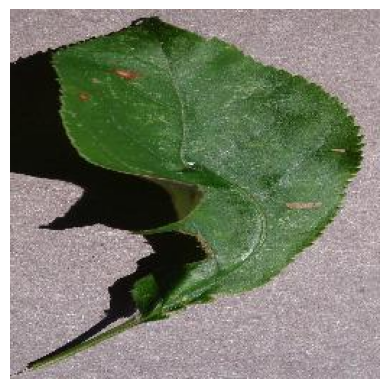

In [22]:
working_dir="plantvillage dataset/color"
img_path="/content/plantvillage dataset/color/Apple___Black_rot/0090d05d-d797-4c99-abd4-3b9cb323a5fd___JR_FrgE.S 8727.JPG"
img=mpimg.imread(img_path)
print(img.shape)
plt.imshow(img)
plt.axis("off")
plt.show()

In [23]:
img_size=224
batch_size=32

In [24]:
data_gen=ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
)

train_generator=data_gen.flow_from_directory(
    working_dir,
    target_size=(img_size,img_size),
    batch_size=batch_size,
    subset="training",
    class_mode="categorical"
)

validation_generator=data_gen.flow_from_directory(
    working_dir,
    target_size=(img_size,img_size),
    batch_size=batch_size,
    subset="validation",
    class_mode="categorical"
)

Found 43456 images belonging to 38 classes.
Found 10849 images belonging to 38 classes.


CNN Learning

In [25]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation="relu",input_shape=(img_size,img_size,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation="relu"))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dense(256,activation="relu")),
model.add(layers.Dropout(0.5)),
model.add(layers.Dense(train_generator.num_classes,activation="softmax"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      47,776,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │           9,766 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,805,158 (182.36 MB)

 Trainable params: 47,805,158 (182.36 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(optimizer="adam",
              loss="categorical_crossentropy",metrics=['accuracy'])

In [28]:
history=model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples//batch_size,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples//batch_size
)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 102s 70ms/step - accuracy: 0.4421 - loss: 2.3920 - val_accuracy: 0.7817 - val_loss: 0.7293
Epoch 2/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 95s 70ms/step - accuracy: 0.7201 - loss: 0.9160 - val_accuracy: 0.8249 - val_loss: 0.5484
Epoch 3/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 140s 69ms/step - accuracy: 0.8007 - loss: 0.6252 - val_accuracy: 0.8507 - val_loss: 0.4739
Epoch 4/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 112s 82ms/step - accuracy: 0.8474 - loss: 0.4820 - val_accuracy: 0.8756 - val_loss: 0.4022
Epoch 5/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 135s 77ms/step - accuracy: 0.8759 - loss: 0.3778 - val_accuracy: 0.8868 - val_loss: 0.3565


In [29]:
val_loss,val_accuracy=model.evaluate(validation_generator,steps=validation_generator.samples//batch_size)
print(f"Validation accuracy: {val_accuracy*100:.2f}%")

339/339 ━━━━━━━━━━━━━━━━━━━━ 16s 47ms/step - accuracy: 0.8900 - loss: 0.3484
Validation accuracy: 88.69%


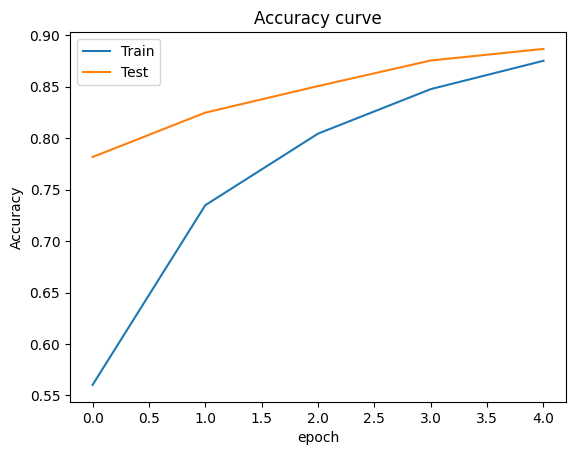

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy curve')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

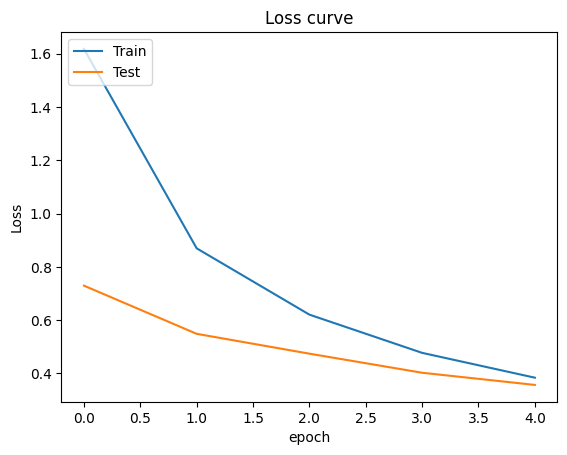

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend(['Train','Test'],loc="upper left")
plt.title("Loss curve")
plt.show()

Building a predictive system

In [32]:
def load_and_preprocess_images(img_path,target_size=(224,224)):
  img=Image.open(img_path)
  img=img.resize(target_size)
  img_arr=np.array(img)
  img_arr=np.expand_dims(img_arr,axis=0)
  img_arr=img_arr.astype('float32')/255.
  return img_arr

def predict_image_class(model,img_path,class_indices):
  imgs=load_and_preprocess_images(img_path)
  predictions=model.predict(imgs)
  predicted_class_index=np.argmax(predictions,axis=1)[0]
  predicted_class_name=class_indices[predicted_class_index]
  return predicted_class_name


In [33]:
class_indices={v:k for k,v in train_generator.class_indices.items()}

In [34]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [35]:
json.dump(class_indices,open('class_indices.json','w'))

In [36]:
samp_img_path="/content/plantvillage dataset/color/Apple___Cedar_apple_rust/025b2b9a-0ec4-4132-96ac-7f2832d0db4a___FREC_C.Rust 3655.JPG"
pred_cname=predict_image_class(model,samp_img_path,class_indices)
print(pred_cname)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Apple___Cedar_apple_rust


In [37]:
print(tf.__version__)

2.18.0
